In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # typical libraries for data manipulation and visualization

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics # sklearn packages needed to run cross-validation and evaluate model performance

from sklearn.linear_model import LogisticRegression # sklearn function for Logistic Regression

import warnings
warnings.filterwarnings("ignore") # prevents warning messages from being displayed (optional)

In [8]:
df = pd.read_csv('asc_variables_liam.csv')

In [9]:
x = df.drop(['millid','donated_this_year','Number of Years Giving','Credited','annualgivingpdi','Consistent Donor','majorgivingevi','annualgivingevi'], axis=1)
x= pd.get_dummies(data=x, drop_first=False)
x = x.fillna(0)

y = df['donated_this_year'].astype(str)
y = y.fillna(0)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(305915, 125)
(76479, 125)
(305915,)
(76479,)


In [11]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True) 

In [12]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=50, min_samples_leaf=15, min_impurity_decrease=0.004)

In [13]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)

x_train['predicted_class'] = y_pred # add predictions to x_train dataframe
x_train['actual_class'] = y_train # add actual classes to x_train dataframe

In [14]:
print(classification_report(y_pred, y_train)) # produces overall accuracy, precision, recall and f1

metrics.cohen_kappa_score(y_pred, y_train) # produces cohen's kappa

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    294426
         1.0       0.73      0.69      0.71     11489
         nan       0.00      0.00      0.00         0

    accuracy                           0.98    305915
   macro avg       0.57      0.56      0.57    305915
weighted avg       0.98      0.98      0.98    305915



0.7022782215551846

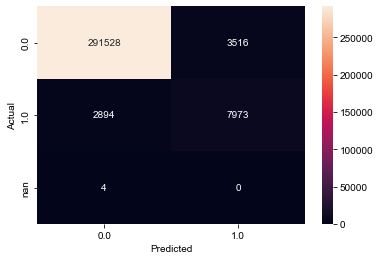

In [15]:
conf = pd.DataFrame(x_train, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

In [16]:
x_train = x_train.drop(['actual_class', 'predicted_class'], axis=1) # drop added actual and predicted classes columns

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     73773
         1.0       0.69      0.74      0.71      2706

    accuracy                           0.98     76479
   macro avg       0.84      0.86      0.85     76479
weighted avg       0.98      0.98      0.98     76479

